# Compress image unsign K-Means algorithm

In [2]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from skimage import io
import time

# only for checking the results
from sklearn.cluster import KMeans

In [6]:
# connect to google drive
# from google.colab import drive
# drive.mount("/content/drive")

# file_path = '/content/drive/My Drive/Colab Notebooks/SPR HWs temp/bird.tiff'
file_path = 'bird.tiff'

## Results using predefined k-means in sklearn

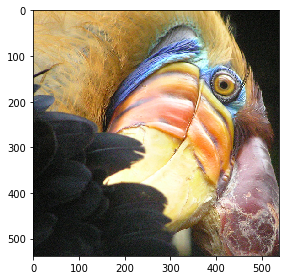

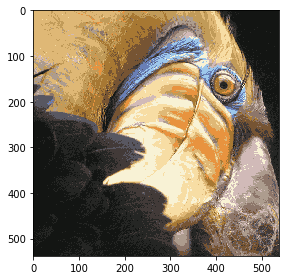

In [3]:
#Read the image
image = io.imread(file_path)
io.imshow(image)
io.show()

#Dimension of the original image
rows = image.shape[0]
cols = image.shape[1]

#Flatten the image
image = image.reshape(rows*cols, 3)

#Implement k-means clustering to form k clusters
kmeans = KMeans(n_clusters=16)
kmeans.fit(image)

#Replace each pixel value with its nearby centroid
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, cols, 3)

#Save and display output image
io.imsave('compressed_bird.png', compressed_image)
io.imshow(compressed_image)
io.show()

## Results by implementing k-means from scratch

K-Means has two main steps:
* Cluster assignments
* Move centroid

What we do first is to randomly initiate k cluster centroids.

In [4]:
class CompressImageWithKMeans():
    def __init__(self, X, num_of_clusters, max_iter, distance_function):
        self.X = X
        self.k = num_of_clusters
        self.centroids = None
        self.max_iter = max_iter
        self.distance_fn = distance_function
        
        # RGB  ->  M * N * 3  -> M: number of rows & N: number of coloumns
        print("image shape: ", self.X.shape)
        
        # initialize centroids
        self.initilize_centroids()
            
    # randomly initiate k-clusters from X as centroid
    def initilize_centroids(self):
        self.centroids = self.X.copy()
        np.random.shuffle(self.centroids)
        self.centroids = self.centroids[:self.k]
        return self.centroids
    
    def find_closest_centroids(self):
        """
        find the cluster label for each point
        e.g output:
        array([10, 10, 10, ...,  1,  1,  1], dtype=int64)
        output shape: (289444,1)
        """
        distances = self.distance_fn(self.X, self.centroids[:, np.newaxis])
        return np.argmin(distances, axis=0)
    
    def move_centroids(self, closest_centroids):
        """
        output shape: (16, 3)
        """
        return np.array([self.X[closest_centroids==k].mean(axis=0) for k in range(self.centroids.shape[0])])
        
    def k_means_loop(self):
        for i in range(self.max_iter):
            closest_centroids = self.find_closest_centroids()
            self.centroids = self.move_centroids(closest_centroids)
        return closest_centroids        

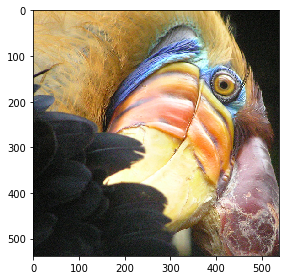

image shape:  (289444, 3)
algorithm is done after 114.38305354118347 seconds.


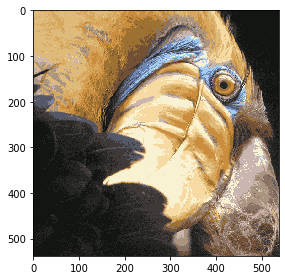

In [7]:
def distance_fn(X, centroids):
    distances = np.sqrt(np.power(np.subtract(X, centroids),2)).sum(axis=2)
    return distances

def read_image(file_path):
    image = io.imread(file_path)
    io.imshow(image)
    io.show()
    # scale image values
    image = image/255
    # reshape image to 2D array (M*N,3)
    reshaped_image = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
    return image, reshaped_image

start = time.time()
image, X = read_image(file_path)
model = CompressImageWithKMeans(X, num_of_clusters=16, max_iter=300, distance_function=distance_fn)
closest_centroids = model.k_means_loop()
k_colors = model.centroids[closest_centroids]
print(f'algorithm is done after {time.time() - start} seconds.')

# recovering image
new_image = np.reshape(k_colors,(image.shape))
io.imshow(new_image)
io.show()